In [50]:
import numpy as np
from numpy.core.fromnumeric import shape
from open3d_vis import Visualizer
import os

In [51]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='/home/max/projects/masterthesis/mini_nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.941 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [52]:
# Load last 3 point clouds
#############################3
# Print List of scenes
nusc.list_scenes()

#Get set of scenes
scenes = nusc.scene
#Get first scenes
scene_0 = scenes[0]
# Get token of first frame
first_sample_token = scene_0['first_sample_token']
sample_0 = nusc.get('sample', first_sample_token)
# Get tokens for 2 following frames
second_sample_token = sample_0['next']
sample_1 = nusc.get('sample', second_sample_token)
third_sample_token = sample_1['next']
sample_2 = nusc.get('sample', third_sample_token)

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

In [53]:
sample_1

{'token': '39586f9d59004284a7114a68825e8eec',
 'timestamp': 1532402928147847,
 'prev': 'ca9a282c9e77460f8360f564131a8af5',
 'next': '356d81f38dd9473ba590f39e266f54e5',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': 'b70cefb08263499eb30c7e7da0031428',
  'RADAR_FRONT_LEFT': 'b5cd02b25f0944f19c0d123fa1fc54ec',
  'RADAR_FRONT_RIGHT': '9b628ce4952a4a839962b77a76630e23',
  'RADAR_BACK_LEFT': '28b610ada2b545d1a5a1bf9d08af0285',
  'RADAR_BACK_RIGHT': '07a62118eb3b43ffa1d833f250ff6f80',
  'LIDAR_TOP': '4f792c8da81e4cb7aca1790654da1c27',
  'CAM_FRONT': '4b6870ae200c4b969b91c50a9737f712',
  'CAM_FRONT_RIGHT': '5c026763ad8146e89c6ee53da26331dc',
  'CAM_BACK_RIGHT': 'c339f7629fdf4c219e30ca1790b53773',
  'CAM_BACK': '661d9842bbb44b208f867f2061c4f535',
  'CAM_BACK_LEFT': '9320f00a62c24b80972048de7a742b4c',
  'CAM_FRONT_LEFT': '2b9d52c5c777455eb31831860c6fc117'},
 'anns': ['7987617983634b119e383d8a29607fd7',
  '216bbbd8e01c450a8fabe9d47433c10a',
  'f0cbd9dbafd74e20bcf6dd0

In [54]:
# Get LIDAR pointcloud
sensor = 'LIDAR_TOP'
lidar_top_data_0 = nusc.get('sample_data', sample_0['data'][sensor])
lidar_top_data_0

{'token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c',
 'timestamp': 1532402927647951,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin',
 'prev': '',
 'next': '0cedf1d2d652468d92d23491136b5d15',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

In [55]:
# Get LIDAR KF pointcloud
lidar_top_data_1 = nusc.get('sample_data', sample_1['data'][sensor])
assert lidar_top_data_1['is_key_frame'] == True
print(lidar_top_data_1)

# Get LIDAR KF pointcloud
lidar_top_data_2 = nusc.get('sample_data', sample_2['data'][sensor])
assert lidar_top_data_2['is_key_frame'] == True
lidar_top_data_2

{'token': '4f792c8da81e4cb7aca1790654da1c27', 'sample_token': '39586f9d59004284a7114a68825e8eec', 'ego_pose_token': '4f792c8da81e4cb7aca1790654da1c27', 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c', 'timestamp': 1532402928147847, 'fileformat': 'pcd', 'is_key_frame': True, 'height': 0, 'width': 0, 'filename': 'samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402928147847.pcd.bin', 'prev': '6c68f70d05d74994817f11131fb21f3d', 'next': '38f3e46f0845441295e639bc5a4e24ca', 'sensor_modality': 'lidar', 'channel': 'LIDAR_TOP'}


{'token': '28aaabeb212146a28a511858c09cf20c',
 'sample_token': '356d81f38dd9473ba590f39e266f54e5',
 'ego_pose_token': '28aaabeb212146a28a511858c09cf20c',
 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c',
 'timestamp': 1532402928698048,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402928698048.pcd.bin',
 'prev': '46aae6c1703e4bd08b4e1d2918eaf724',
 'next': 'b0a057549fb24e938f94f717c4f7446a',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

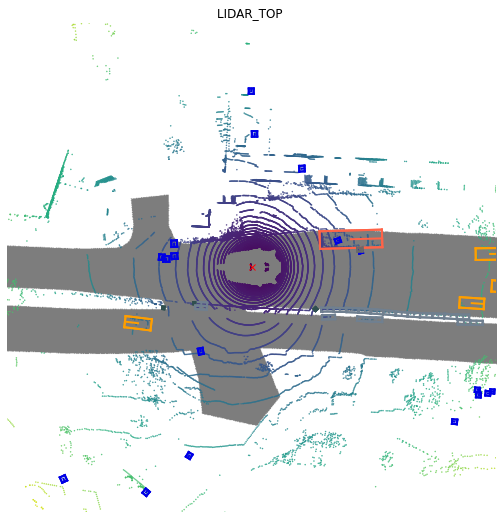

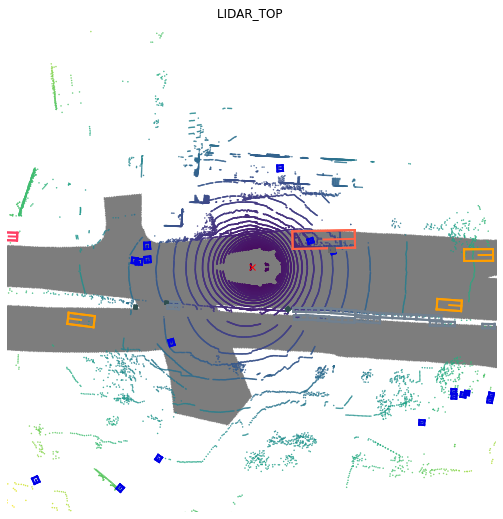

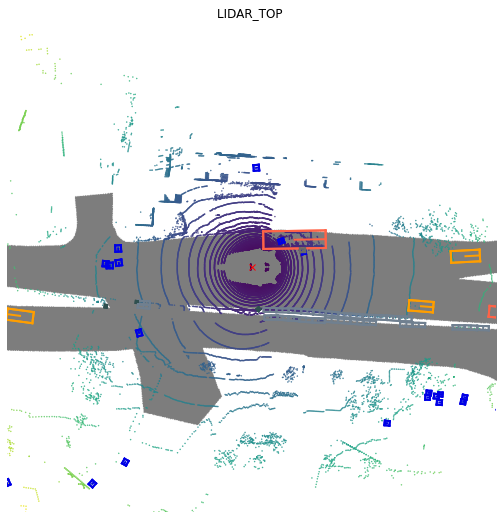

In [48]:
nusc.render_sample_data(lidar_top_data_0['token'])
nusc.render_sample_data(lidar_top_data_1['token'])
nusc.render_sample_data(lidar_top_data_2['token'])

In [49]:
# Get point clouds
import os.path as osp
from nuscenes.utils.data_classes import LidarPointCloud, Box

pcl0_path = osp.join(nusc.dataroot, lidar_top_data_0['filename'])
pcl1_path = osp.join(nusc.dataroot, lidar_top_data_1['filename'])
pcl2_path = osp.join(nusc.dataroot, lidar_top_data_2['filename'])
#Load Pointclouds
pc0 = LidarPointCloud.from_file(pcl0_path)
pc1 = LidarPointCloud.from_file(pcl1_path)
pc2 = LidarPointCloud.from_file(pcl2_path)

In [74]:
# Get set of object centers

_, boxes0, _= nusc.get_sample_data(lidar_top_data_0['token'], selected_anntokens=None, use_flat_vehicle_coordinates =False)
_, boxes1, _= nusc.get_sample_data(lidar_top_data_1['token'], selected_anntokens=None, use_flat_vehicle_coordinates =False)
_, boxes2, _= nusc.get_sample_data(lidar_top_data_2['token'], selected_anntokens=None, use_flat_vehicle_coordinates =False)
# for box in boxes:
    # c = np.array(self.get_color(box.name)) / 255.0
    # box.render(axes[0], view=view, colors=(c, c, c))
    # corners = view_points(boxes[0].corners(), view, False)[:2, :]

In [57]:
# Stack point clouds
pc0

In [ ]:
import matplotlib.pyplot as plt

In [58]:
# Get set of object centers

In [59]:
# Draw 